In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

>Guys,Welcome to my notebook. Here I will try to explain each and every functions,module, statements used in this notebook. Even if u have not a simple peice of information about NLP or Text Analysis, you will understand this notebook so easily... keep reading...

In [85]:
# loading train and test dataset
train=pd.read_csv('disaster-tweets-train.csv')
test=pd.read_csv('disaster-tweets-test.csv')

In [86]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [87]:
train.shape

(7613, 5)

**WE HAVE 7613 ROWS AND 5 COLUMS**

In [88]:
# getting duplicates rows in id column
duplicate_id=train[train.duplicated(keep='last')]
print(duplicate_id)

Empty DataFrame
Columns: [id, keyword, location, text, target]
Index: []


> AS WE CAN SEE THERE IS NO DUPLICATED ID IN ID COLUMN

In [89]:
# Getting null values in train dataset
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [90]:
# dropping two columsn since they are not of much use
train.drop(['location','keyword'],axis=1,inplace=True)

In [91]:
train.head(2)

,id,text,target
0,1,Our Deeds are the Reason of this #earthquake M...,1
1,4,Forest fire near La Ronge Sask. Canada,1


In [92]:
train.isnull().sum()

id        0
text      0
target    0
dtype: int64

**There is no null value left after dropping those unnecessary columns**

In [93]:
# making separate dataset of where tweets are disastrous (train.target==1), and non disastrous
train_1=train[train['target']==1]
train_0=train[train['target']==0]

In [94]:
# percentage of disastrous tweets
per=(len(train_1)/len(train))*100
per

42.96597924602653

**Around 43 percent of the total tweets are disastrous**

In [95]:
# percentage of non-disastrous (or fake disastrous) tweets
per=(len(train_0)/len(train))*100
per

57.03402075397347

**Around 57 percent of the total tweets are non-disastrous**

In [96]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='target', ylabel='count'>

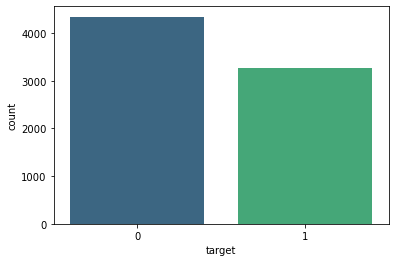

In [97]:
# visualising fake and real disastrous tweets
sns.countplot(train['target'],palette='viridis')

**Number of fake disastrous tweets are a little more than that of real disastrous tweets**

The "string" module of python contains "constants" and "classes" for working with text.
The "constants" is used to specify categories of characters such as ascii_letters and digits.

Below, we have used such a constants named "punctuation" from "string" module of python, it returns all sets of punctuation.
It Doesn’t take any parameter, since it’s not a function.
See Below code and output

In [98]:
import string
# print all punctuation
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [99]:
from nltk.corpus import stopwords
# see terms's explanation below

Natural Language Toolkit (NLTK) is a widely used, open-source Python library for NLP (NLTK Project, 2018). Several algorithms are available for working with test data e.g. text tokenization, stemming, stop word removal, classification, clustering, PoS tagging, parsing, and semantic reasoning. It also provides wrappers for other NLP libraries.

A corpus can be defined as a collection of text documents. It can be thought as just a bunch of text files in a directory, often alongside many other directories of text files.

Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. For example, the words like the, he, have etc.

In [100]:
# printing list of all stopwords in english
print(stopwords.words('english'),end='')

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

> U can see that most of the stopwords are pronouns, auxiliary verbs, helping verbs, prepositions, conjuctions etc

In [101]:
# storing all stop words in a variable for future use
stopwords_=stopwords.words('english')

In [102]:
# text cleaning
text = [x for x in train['text'] if x not in string.punctuation]
text = ''.join(text)
text = [x for x in text.split(' ') if x not in stopwords_]

> In order to use textual data for predictive modeling, the text must be parsed(resolved into compenent parts) to remove certain words – this process is called tokenization.** 

> These words need to then be encoded as integers, or floating-point values, for use as inputs in machine learning algorithms. This process is called feature extraction (or vectorization)

In [103]:
from sklearn.feature_extraction.text import CountVectorizer
# CountVectorizer is used to convert a collection of text documents to a vector of term/token counts.

> The sklearn.feature_extraction module can be used to extract features in a format supported by machine learning algorithms from datasets consisting of formats such as text and image.

> Feature extraction is very different from Feature selection: "Feature extraction" helps in transforming arbitrary data, such as text or images, into numerical features usable for machine learning. While "feature_selection" is a machine learning technique applied on these features.

In [104]:
cv = CountVectorizer()

In [113]:
x=train['text']

In [114]:
x=cv.fit_transform(x)

In [118]:
x=x.toarray()

In [105]:
train['text']

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 7613, dtype: object

****There are 7613 disasterous tweets and 26918 unique words.****

In [119]:
y = train['target']

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [121]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=1)

In [123]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)

LogisticRegression()

In [125]:
from sklearn.metrics import accuracy_score
lr_pred=lr.predict(xtest)
accuracy_score(ytest,lr_pred)

0.7951680672268907

In [126]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)
dtc_pred=dtc.predict(xtest)
accuracy_score(ytest,dtc_pred)

0.7394957983193278

In [127]:
# Random forest model
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(xtrain,ytrain)
rfc_pred=rfc.predict(xtest)
accuracy_score(ytest,rfc_pred)

0.7888655462184874

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

##### Working with Test Data

In [ ]:
test.head()

In [ ]:
test.drop(['keyword','location'],axis=1,inplace= True)

In [ ]:
test.head(2)

In [ ]:
test_vectorizer=vectorizer.transform(test['text'])

In [ ]:
final_pred=lr.predict(test_vectorizer)
# we are using logistic regression for the final prediction since it has the highest accuracy 

In [ ]:
my_pred={'id':test['id'],'target':final_pred}

In [ ]:
my_submission=pd.DataFrame(my_pred)

In [ ]:
my_submission

## My Implementaion

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train=pd.read_csv('disaster-tweets-train.csv')
test=pd.read_csv('disaster-tweets-test.csv')

In [3]:
train.head(2)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1


In [4]:
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [5]:
train.text.duplicated().any()

True

* WE HAVE DUPLIATE ROWS IN TEXT COLUMN

In [6]:
train.id.duplicated().any()

False

In [7]:
print(train.location.duplicated().any())
print('There are',train.location.duplicated().sum(),'duplicate values in the location column')

True
There are 4271 duplicate values in the location column


In [8]:
train['text'].duplicated().sum()

110

* WE HAVE 110 DUPLICATE ROWS IN THE COLUMN

In [9]:
train.drop(['keyword','location'],axis=1,inplace=True)

In [10]:
train.shape

(7613, 3)

In [11]:
import string
import re

In [12]:
from nltk.corpus import stopwords
sw=stopwords.words('english')

In [15]:
# Preprocessing the data

train['text']=[i for i in train['text'] if i not in string.punctuation]
train['text']=''.join(train['text'])
# train['text']=re.sub('http://.+','',train['text'])
# train['text']=re.sub('https://.+','',train['text'])
train['text']=[i for i in train['text'].split(' ') if i not in sw]
train['text'][0:10]

MemoryError: 

* Now we are done with preprocessing cleaning, we will start developing the model.
* before we develop the model, it is necessory that our textual data get converted into a vector or numnerical form for use in machine learning.

In [76]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [77]:
train.head(2)

,id,text,target
0,1,Our Deeds are the Reason of this #earthquake M...,1
1,4,Forest fire near La Ronge Sask. Canada,1


In [80]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=1)

ValueError: Found input variables with inconsistent numbers of samples: [7064, 7613]